### Gradient Descent algorithm

After learning how to implement gradient descent algorithm to use that in implementing 
linear regression, in this notebook, we want to test our model which is written from scratch
to test if that works properly. 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from SGDRegressor import SGDRegressor
from sklearn.linear_model import SGDRegressor as sklearn_SGD
from sklearn.preprocessing import StandardScaler

We use the famous housing dataset for testing our model. Notice that for now, we just work with numerical columns.

In [10]:
df = pd.read_csv('../../data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.shape

(545, 13)

Here, we specify the features for our model, and also split training and test sets.

We select 500 rows of our data for training, and the remaining rows for testing.

In [12]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x_train = df.loc[:500, features]
x_test = df.loc[500:, features]
y_train = df.loc[:500, 'price']
y_test = df.loc[500:, 'price']
x_train.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [13]:
sgd = SGDRegressor(alpha=.01)
error_hist_steps = 10
iteration_num = 800
sgd.fit(x_train, y_train, iteration_num, error_hist_steps=error_hist_steps)

To see if our model works good, we graph errors after each 100 steps:

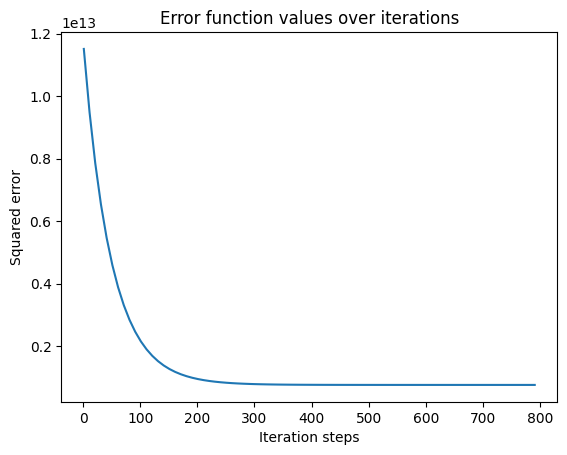

In [6]:
errors = sgd.error_hist
steps = len(errors)
plt.plot(list(range(1, iteration_num+1, error_hist_steps)), errors)
plt.xlabel('Iteration steps')
plt.ylabel('Squared error')
plt.title('Error function values over iterations')
plt.show()

Let's see what are the parameters of our model after training:

In [14]:
w = sgd.coefs_
b = sgd.bias_
print(w)
print(b)

[658351.01282915 105792.71867394 574334.85539338 456798.89821556
 300160.90918747]
4981646.3605895955


## Comparing our model with the scikit-learn SGDRegressor model
First, we normalize our data using standard scaling method, because we use this method by default in our 
implementation of our algorithm too! Then, we train our data with this algorithm.

In [16]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(X=x_train)
sklearn_sgd = sklearn_SGD(max_iter=800)
sklearn_sgd.fit(x_norm, y_train)

SGDRegressor(max_iter=800)

We can check the parameters of our trained algorithm in scikit-learn too:

In [17]:
sklearn_w = sklearn_sgd.coef_
sklearn_b = sklearn_sgd.intercept_
print(sklearn_w)
print(sklearn_b)

[651382.49835709 101244.04325469 572664.17207482 455386.78725418
 296803.64784286]
[4976375.56258978]


It's abvious that parameters in our implemented algorithm are so close to the parameters in the sckikit-learn library trained algorithm. 

We can put them in a pandas dataframe to make comparing easier: 

In [23]:
parameters = pd.DataFrame({"sklearn-parameters": sklearn_w + sklearn_b, "scratch-parameters": w + b}, index=['w1', 'w2', 'w3', 'w4', 'b'])
parameters

,sklearn-parameters,scratch-parameters
w1,5.627758e+06,5.639997e+06
w2,5.077620e+06,5.087439e+06
w3,5.549040e+06,5.555981e+06
w4,5.431762e+06,5.438445e+06
b,5.273179e+06,5.281807e+06
